In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy.fft import fft, fftfreq
import pandas as pd
import binascii
from numpy.core.shape_base import hstack

In [2]:
#criação de seno
def cont_sin(time, sample_rate, frequency):
    time = time
    sample = sample_rate
    f = frequency
    t = np.linspace(time, time+0.1, sample)
    signal = np.sin(2*np.pi*f*t)
    return t, signal

In [3]:
#padrões de frequencia
Fs = 10000
T = 0
fc1 = 1300 #1
fc2 = 1700 #0

In [14]:
#construindo mensagem
ascii_message = 'hello comp'
message = bin(int.from_bytes(ascii_message.encode(), 'big'))
print(message)
len_message = len(ascii_message)

0b1101000011001010110110001101100011011110010000001100011011011110110110101110000


In [15]:
#extraindo o b da mensagem
bin_message = '0' + message[2:]

#cria matriz de amostras do tamanho da mensagem
freq_bin_message = np.zeros(len(bin_message))
tam = len(freq_bin_message)

#preenche vetor freq_bin_message com a frequencia de cada elemento 
for i in range(tam):
  if bin_message[i] == '0':
    freq_bin_message[i] = fc2
  else:
    freq_bin_message[i] = fc1

print(freq_bin_message)

[1700. 1300. 1300. 1700. 1300. 1700. 1700. 1700. 1700. 1300. 1300. 1700.
 1700. 1300. 1700. 1300. 1700. 1300. 1300. 1700. 1300. 1300. 1700. 1700.
 1700. 1300. 1300. 1700. 1300. 1300. 1700. 1700. 1700. 1300. 1300. 1700.
 1300. 1300. 1300. 1300. 1700. 1700. 1300. 1700. 1700. 1700. 1700. 1700.
 1700. 1300. 1300. 1700. 1700. 1700. 1300. 1300. 1700. 1300. 1300. 1700.
 1300. 1300. 1300. 1300. 1700. 1300. 1300. 1700. 1300. 1300. 1700. 1300.
 1700. 1300. 1300. 1300. 1700. 1700. 1700. 1700.]


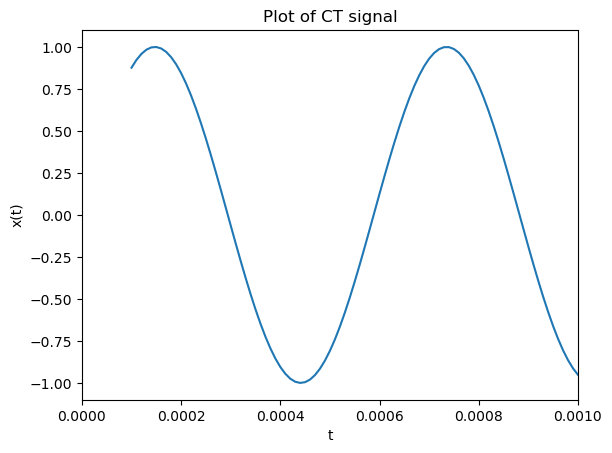

In [16]:
#criando sinal
signal = np.zeros(0)
t = np.zeros(0)

for i in range(len(freq_bin_message)):
  t_result, signal_result1 = cont_sin(T, Fs, freq_bin_message[i])
  signal = np.hstack((signal, signal_result1))
  t = np.hstack((t, t_result))
  T = T + 0.1

plt.plot(t, signal)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Plot of CT signal')
plt.xlim([0, 0.001])
plt.show()

In [17]:
string_demodulada = '0b' #usar para converter string_demodulada após a conversão de frequências em 0 ou 1
samples_bit = 10000

#----------------------- Demodulador -----------------------

for i in range(len(freq_bin_message)):
    
    inicio = i * samples_bit
    fim = (i + 1) * samples_bit
    
    N = 1000 # 1000
    T = 1/Fs

    yf = fft(signal[inicio:fim])
    frequencias = fftfreq(N, T)[:N//2]
    amplitudes = 2.0/N * np.abs(yf[:N//2])
    
    result = np.where(amplitudes == np.amax(amplitudes))
    if frequencias[result] == fc1:
        string_demodulada += "1"
    else:
        string_demodulada += "0"

In [18]:
# Converter Mensagem
print(string_demodulada)
n = int(string_demodulada, 2)
binascii.unhexlify('%x' % n)

print(binascii.unhexlify('%x' % n))

0b01101000011001010110110001101100011011110010000001100011011011110110110101110000
b'hello comp'
